# **Exploratory Data Analysis (EDA)**

In [1]:
# Importing libraries

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter
from google.colab import drive
import seaborn as sns
import numpy as np

In [2]:
# Mounting the drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Navigating to the folder

%cd '/content/drive/My Drive/Thesis/Papers/Paper_4/Notebook'

/content/drive/My Drive/Thesis/Papers/Paper_4/Notebook


In [4]:
# Checking for the info inside the folder

!ls

1-josedhernandezbetancur-EDA.ipynb  reliability.pdf
classdistributionbycountry.pdf	    top10industries.pdf
classdistribution.pdf		    totalflowforchemicals.pdf
data.csv			    transferclasses.pdf
flowdistribution.pdf


## **1. Data entries from the PRTR_transfers database**

The following commands are used to obtain the data.csv file in the tmp folder:



1.   ```
sudo -i -u postgres
```

2. ```
psql
```

3. ```
\c PRTR_transfers
```

4. ```
\COPY (SELECT tr.reporting_year,
              tr.transfer_amount_kg,
              tr.reliability_score,
              gtc.generic_transfer_class_name,
              gs.generic_substance_name,
              gsec.generic_sector_name,
              prtr.country
      FROM transfer_record AS tr
      INNER JOIN national_generic_transfer_class AS ngtc
      ON tr.national_generic_transfer_class_id = ngtc.national_generic_transfer_class_id
      INNER JOIN generic_transfer_class AS gtc
      ON ngtc.generic_transfer_class_id = gtc.generic_transfer_class_id
      INNER JOIN national_generic_substance AS ngs
      ON ngs.national_generic_substance_id = tr.national_generic_substance_id
      INNER JOIN generic_substance AS gs
      ON gs.generic_substance_id = ngs.generic_substance_id
      INNER JOIN facility AS f
      ON f.national_facility_and_generic_sector_id = tr.national_facility_and_generic_sector_id
      INNER JOIN national_generic_sector AS ngsec
      ON ngsec.national_generic_sector_id = f.national_generic_sector_id
      INNER JOIN generic_sector AS gsec
      ON gsec.generic_sector_code = ngsec.generic_sector_code
      INNER JOIN national_sector AS nsec
      ON nsec.national_sector_id = ngsec.national_sector_id
      INNER JOIN prtr_system AS prtr
      ON nsec.industry_classification_system = prtr.industry_classification_system)
      TO '/tmp/data.csv' WITH CSV DELIMITER ',' HEADER
```

After that, you can execute the next command for copy the file to Documents folder:



```
cp /tmp/data.csv /home/jodhernandezbe/Documents/data.csv
```





In [5]:
df = pd.read_csv('./data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116212 entries, 0 to 3116211
Data columns (total 7 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   reporting_year               int64  
 1   transfer_amount_kg           float64
 2   reliability_score            int64  
 3   generic_transfer_class_name  object 
 4   generic_substance_name       object 
 5   generic_sector_name          object 
 6   country                      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 166.4+ MB


In [7]:
df.head()

,reporting_year,transfer_amount_kg,reliability_score,generic_transfer_class_name,generic_substance_name,generic_sector_name,country
0,2010,2557.0,1,Sewerage,2-Butanone,"Manufacture of motor vehicles, trailers and se...",AUS
1,2011,1430.0,1,Energy recovery,2-Butanone,Repair and installation of machinery and equip...,AUS
2,2010,7000.0,3,Recycling,2-Butanone,"Manufacture of motor vehicles, trailers and se...",AUS
3,2009,108911.0,4,Recycling,2-Butanone,"Manufacture of motor vehicles, trailers and se...",AUS
4,2012,8425.0,3,Energy recovery,2-Butanone,Manufacture of chemicals and chemical products,AUS


## **2 Reliability score**

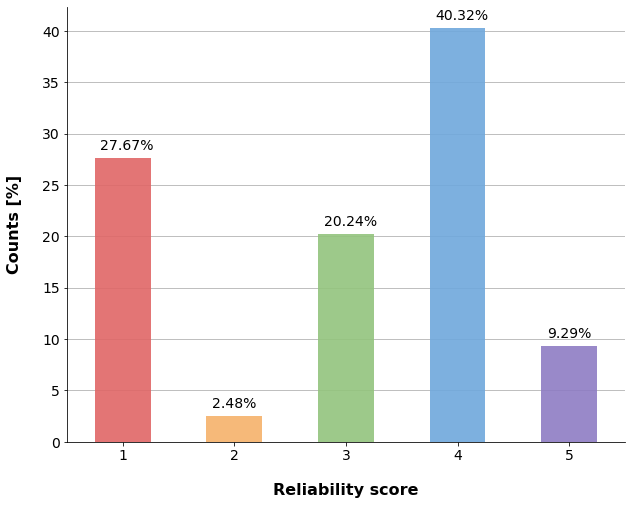

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,8))

df_to_plot_1 = (df['reliability_score'].value_counts().sort_index()*100/df.shape[0]).round(2)
df_to_plot_1.plot(kind='bar',
                  alpha=0.9,
                  color=['#e06666', '#f6b26b', '#93c47d', '#6fa8dc', '#8e7cc3'])

# Axis names
plt.xlabel('Reliability score', fontsize=16, fontweight='bold', labelpad=20)
plt.ylabel('Counts [%]', fontsize=16, fontweight='bold', labelpad=20)

# Rorating the x ticks
plt.xticks(rotation=0)

# Organize horizontal grid
ax1.grid(axis='y') 
ax1.set_axisbelow(True)

# Remove top and right boders
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

xlocs, _ = plt.xticks()
# Text at the bat top
for i, v in enumerate(df_to_plot_1.tolist()):
  plt.text(xlocs[i] - 0.2, v + 0.8, f'{v}%', fontsize=14)

# X ticks fontsize
for tick in ax1.xaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Y ticks fontsize
for tick in ax1.yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

plt.savefig('./reliability.pdf', dpi=fig1.dpi, bbox_inches='tight')
plt.show()

## **3. Transfer class**

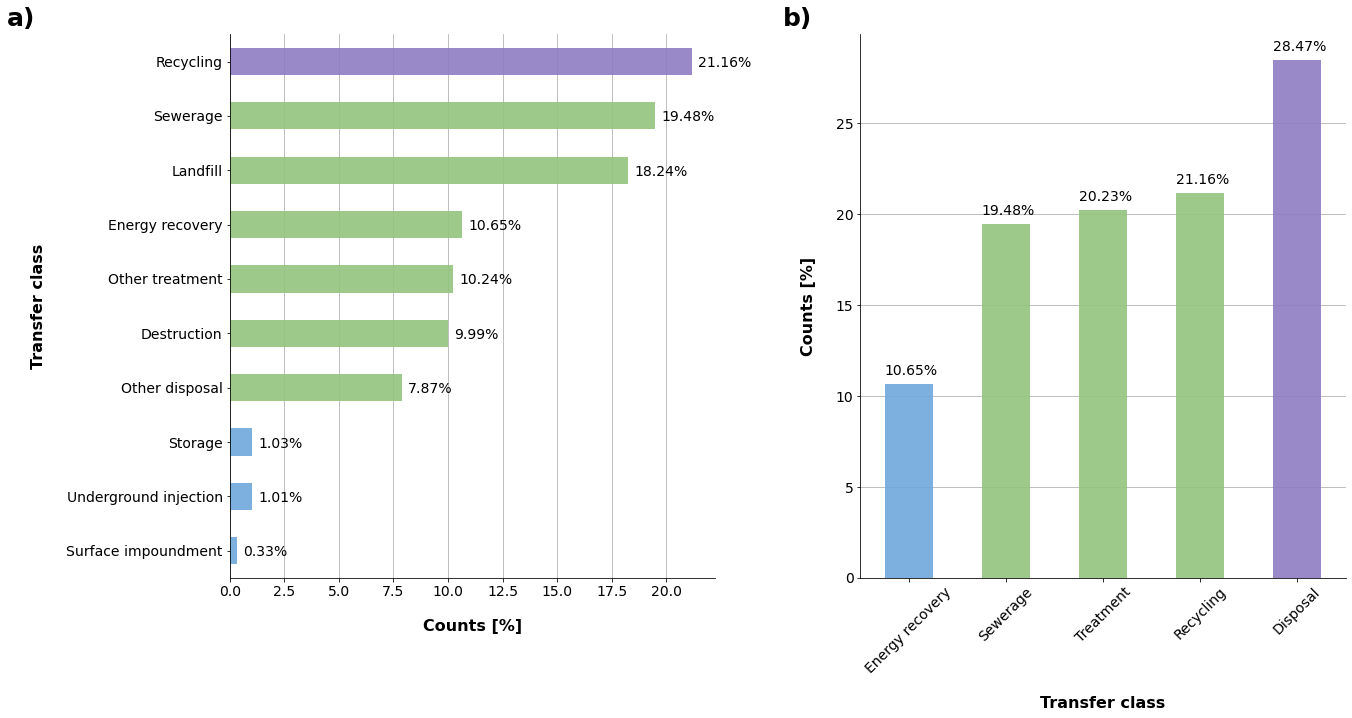

In [ ]:
fig2, ax2 = plt.subplots(1, 2, figsize=(20,10))

# Subplot 1
df_to_plot_2 = (df['generic_transfer_class_name'].value_counts().sort_values()*100/df.shape[0]).round(2)
df_to_plot_2.plot(kind='barh',
                  alpha=0.9,
                  ax=ax2[0],
                  color=['#6fa8dc']*3 + ['#93c47d']*6 + ['#8e7cc3'])

# Axis names
ax2[0].set_ylabel('Transfer class', fontsize=16, fontweight='bold', labelpad=20)
ax2[0].set_xlabel('Counts [%]', fontsize=16, fontweight='bold', labelpad=20)

# Remove top and right boders
ax2[0].spines['right'].set_visible(False)
ax2[0].spines['top'].set_visible(False)

# Organize vertical grid
ax2[0].grid(axis='x') 
ax2[0].set_axisbelow(True)

ylocs12 = ax2[0].get_yticks()
# Text at the bat top
for i, v in enumerate(df_to_plot_2.tolist()):
  ax2[0].text(v + 0.3, ylocs12[i] - 0.1, f'{v}%', fontsize=14)

# Y ticks fontsize
for tick in ax2[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# X ticks fontsize
for tick in ax2[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Name for subplot 1
ax2[0].text(-0.4, 1.05, 'a)', transform=ax2[0].transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')


# Subplot 2
df_to_plot_3 = (df['generic_transfer_class_name'].map({'Surface impoundment': 'Disposal',
                      'Underground injection': 'Disposal',
                      'Storage': 'Disposal',
                      'Other disposal': 'Disposal',
                      'Destruction': 'Treatment',
                      'Other treatment': 'Treatment',
                      'Energy recovery': 'Energy recovery',
                      'Landfill': 'Disposal',
                      'Sewerage': 'Sewerage',
                      'Recycling': 'Recycling'}).value_counts().sort_values()*100/df.shape[0]).round(2)

df_to_plot_3.plot(kind='bar',
                  alpha=0.9,
                  ax=ax2[1],
                  color=['#6fa8dc'] + ['#93c47d']*3 + ['#8e7cc3'],
                  rot=45)

# Axis names
ax2[1].set_xlabel('Transfer class', fontsize=16, fontweight='bold', labelpad=20)
ax2[1].set_ylabel('Counts [%]', fontsize=16, fontweight='bold', labelpad=20)

# Remove top and right boders
ax2[1].spines['right'].set_visible(False)
ax2[1].spines['top'].set_visible(False)

# Organize vertical grid
ax2[1].grid(axis='y') 
ax2[1].set_axisbelow(True)

xlocs22 = ax2[1].get_xticks()
# Text at the bat top
for i, v in enumerate(df_to_plot_3.tolist()):
  ax2[1].text(xlocs22[i] - 0.25, v + 0.5, f'{v}%', fontsize=14)

# X ticks fontsize
for tick in ax2[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Y ticks fontsize
for tick in ax2[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Name for subplot 2
ax2[1].text(-0.1, 1.05, 'b)', transform=ax2[1].transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')

plt.subplots_adjust(wspace=0.3)

plt.savefig('./transferclasses.pdf', dpi=fig2.dpi, bbox_inches='tight')
plt.show()

## **4. Flow distribution**

In [ ]:
df.reporting_year.min()

1987

In [ ]:
df.reporting_year.max()

2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


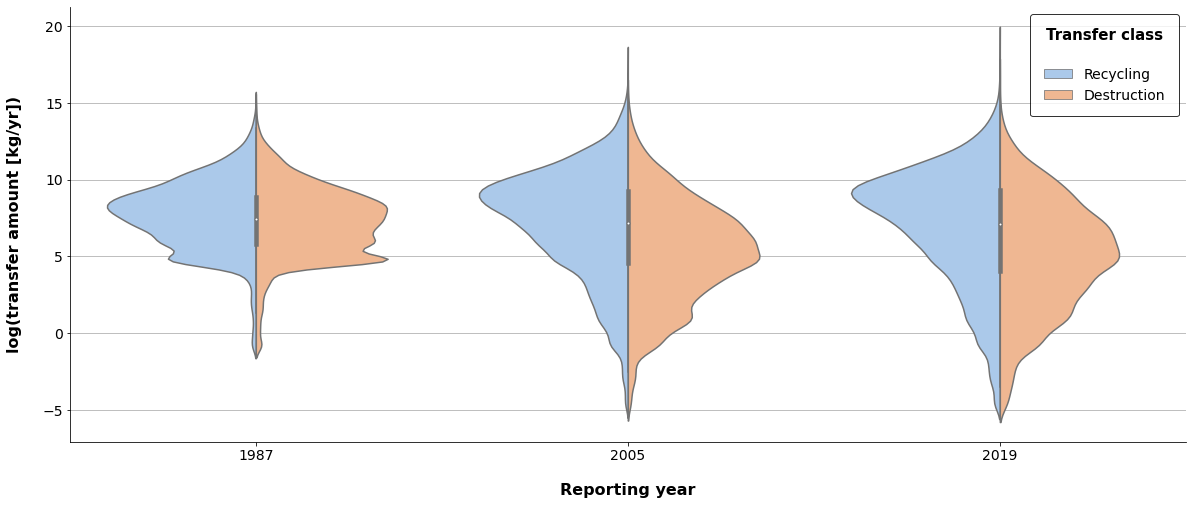

In [ ]:
fig3, ax3 = plt.subplots(figsize=(20,8))

df_to_plot_4 = df[(df.reporting_year.isin([1987, 2005, 2019])) &
                  (df.generic_transfer_class_name.isin(['Destruction', 'Recycling'])) &
                  (df.transfer_amount_kg != 0)]
df_to_plot_4.reset_index(inplace=True, drop=True)
df_to_plot_4['transfer_amount_kg'] = df_to_plot_4['transfer_amount_kg'].apply(lambda x: np.log(x))

sns.violinplot(data=df_to_plot_4,
            kind='violin',
            x='reporting_year',
            y='transfer_amount_kg',
            hue='generic_transfer_class_name',
            split=True,
            plot_kws={'alpha':0.9},
            ax=ax3,
            palette=sns.color_palette("pastel"))

# Organize vertical grid
ax3.grid(axis='y') 
ax3.set_axisbelow(True)

# Axis names
ax3.set_ylabel('log(transfer amount [kg/yr])', fontsize=16, fontweight='bold', labelpad=20)
ax3.set_xlabel('Reporting year', fontsize=16, fontweight='bold', labelpad=20)

# Remove top and right boders
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

# X ticks fontsize
for tick in ax3.xaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Y ticks fontsize
for tick in ax3.yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Legend
leg3 = plt.legend(frameon=True, fontsize=14,
           title='Transfer class\n',
           title_fontsize=15,
           borderpad=1)
leg3.get_frame().set_edgecolor('black')
leg3.get_title().set_fontweight('bold')

plt.savefig('./flowdistribution.pdf', dpi=fig3.dpi, bbox_inches='tight')
plt.show()

## **5. Transfer class**

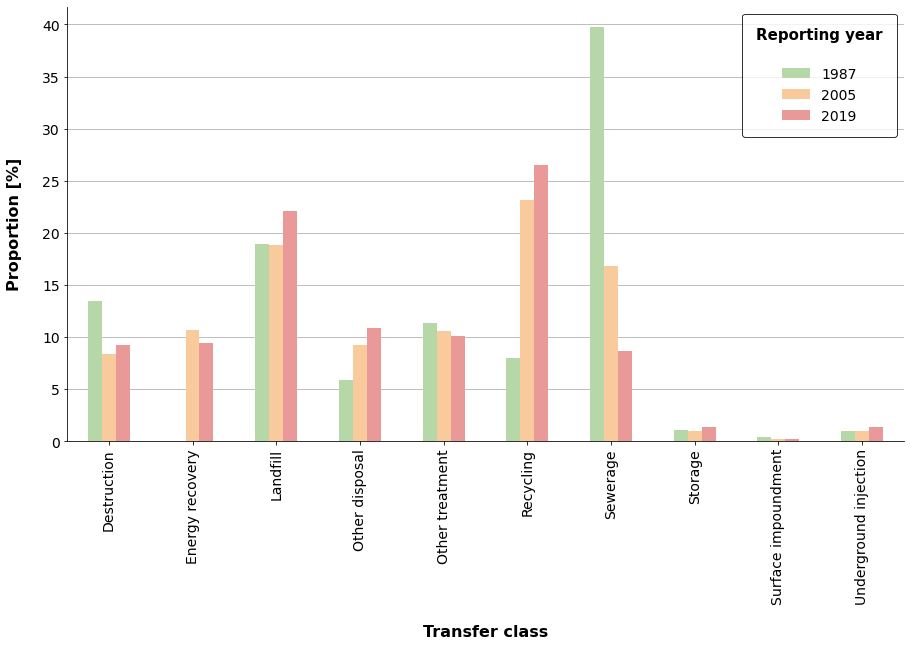

In [ ]:
fig4, ax4 = plt.subplots(figsize=(15,8))


df_to_plot_5 = df.loc[df.reporting_year.isin([1987, 2005, 2019]),
                      ['reporting_year', 'generic_transfer_class_name']]
df_to_plot_5.reset_index(inplace=True, drop=True)
df_to_plot_5['times'] = 1
df_to_plot_5 = df_to_plot_5.pivot_table(index=['generic_transfer_class_name'],
                         columns=['reporting_year'],
                         aggfunc='sum')
df_to_plot_5 = (df_to_plot_5 * 100/ df_to_plot_5.sum(axis=0)).round(2)

df_to_plot_5.plot(kind='bar',
                  alpha=1,
                  ax=ax4,
                  color=['#b6d7a8', '#f9cb9c', '#ea9999'],
                  rot=90)

# Organize vertical grid
ax4.grid(axis='y') 
ax4.set_axisbelow(True)

# Axis names
ax4.set_ylabel('Proportion [%]', fontsize=16, fontweight='bold', labelpad=20)
ax4.set_xlabel('Transfer class', fontsize=16, fontweight='bold', labelpad=20)

# Remove top and right boders
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

# X ticks fontsize
for tick in ax4.xaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Y ticks fontsize
for tick in ax4.yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Legend
leg4 = plt.legend(frameon=True, fontsize=14,
           title='Reporting year\n',
           title_fontsize=15,
           borderpad=1,
           labels=['1987', '2005', '2019'])
leg4.get_frame().set_edgecolor('black')
leg4.get_title().set_fontweight('bold')

plt.savefig('./classdistribution.pdf', dpi=fig4.dpi, bbox_inches='tight')

plt.show()

## **6. Difference in the transfer class distribution between countries**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


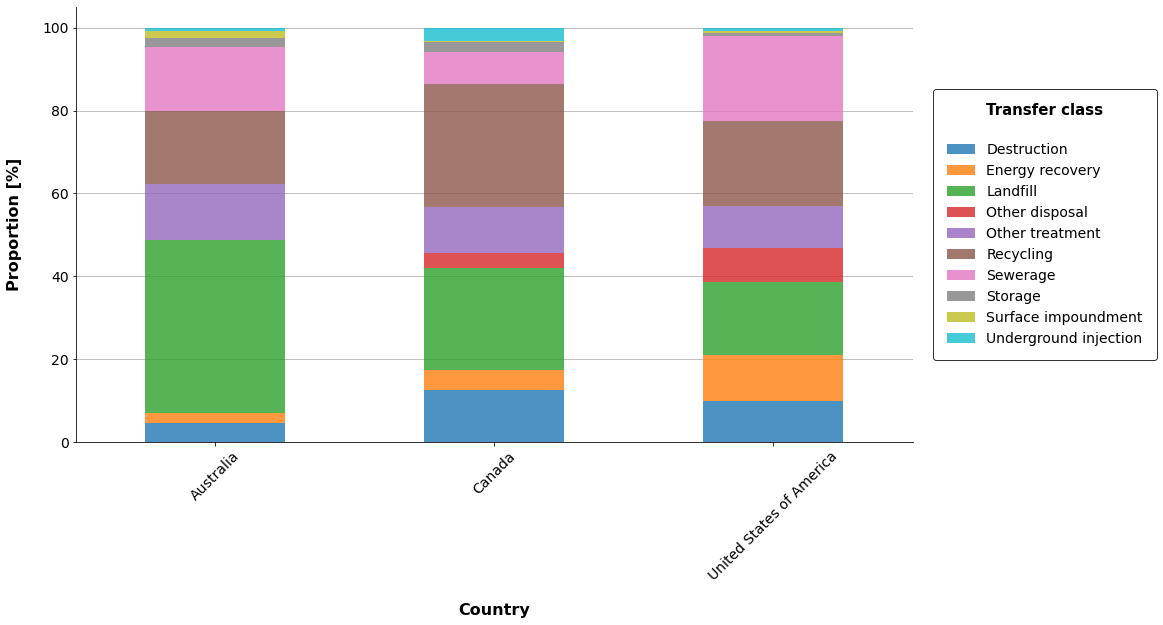

In [ ]:
fig5, ax5 = plt.subplots(figsize=(15,8))

df_to_plot_6 = df[['country', 'generic_transfer_class_name']]
df_to_plot_6['times'] = 1
df_to_plot_6 = df_to_plot_6.groupby(['country', 'generic_transfer_class_name'], as_index=False).sum()
df_to_plot_6['country'] = df_to_plot_6.country.map({'AUS': 'Australia',
                                                    'CAN': 'Canada',
                                                    'USA': 'United States of America'})
df_to_plot_6 = df_to_plot_6.pivot_table(columns=['generic_transfer_class_name'],
                         index=['country'],
                          aggfunc='sum')
df_to_plot_6 = (df_to_plot_6.T * 100/ df_to_plot_6.T.sum(axis=0)).T
df_to_plot_6.plot(kind='bar',
                  stacked=True,
                  ax=ax5,
                  alpha=0.8,
                  rot=45)

# Organize vertical grid
ax5.grid(axis='y') 
ax5.set_axisbelow(True)

# Axis names
ax5.set_ylabel('Proportion [%]', fontsize=16, fontweight='bold', labelpad=20)
ax5.set_xlabel('Country', fontsize=16, fontweight='bold', labelpad=20)

# Remove top and right boders
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

# X ticks fontsize
for tick in ax5.xaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Y ticks fontsize
for tick in ax5.yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Legend
leg5 = plt.legend(frameon=True, fontsize=14,
           title='Transfer class\n',
           title_fontsize=15,
           borderpad=1,
           labels=['Destruction', 'Energy recovery',
                   'Landfill', 'Other disposal',
                   'Other treatment', 'Recycling',
                   'Sewerage', 'Storage',
                   'Surface impoundment', 'Underground injection'],
            loc='center right',
            bbox_to_anchor=(1.3, 0.5))
leg5.get_frame().set_edgecolor('black')
leg5.get_title().set_fontweight('bold')

plt.savefig('./classdistributionbycountry.pdf', dpi=fig5.dpi, bbox_inches='tight')

plt.show()

## **7. Reporting of chemicals across years and countries**

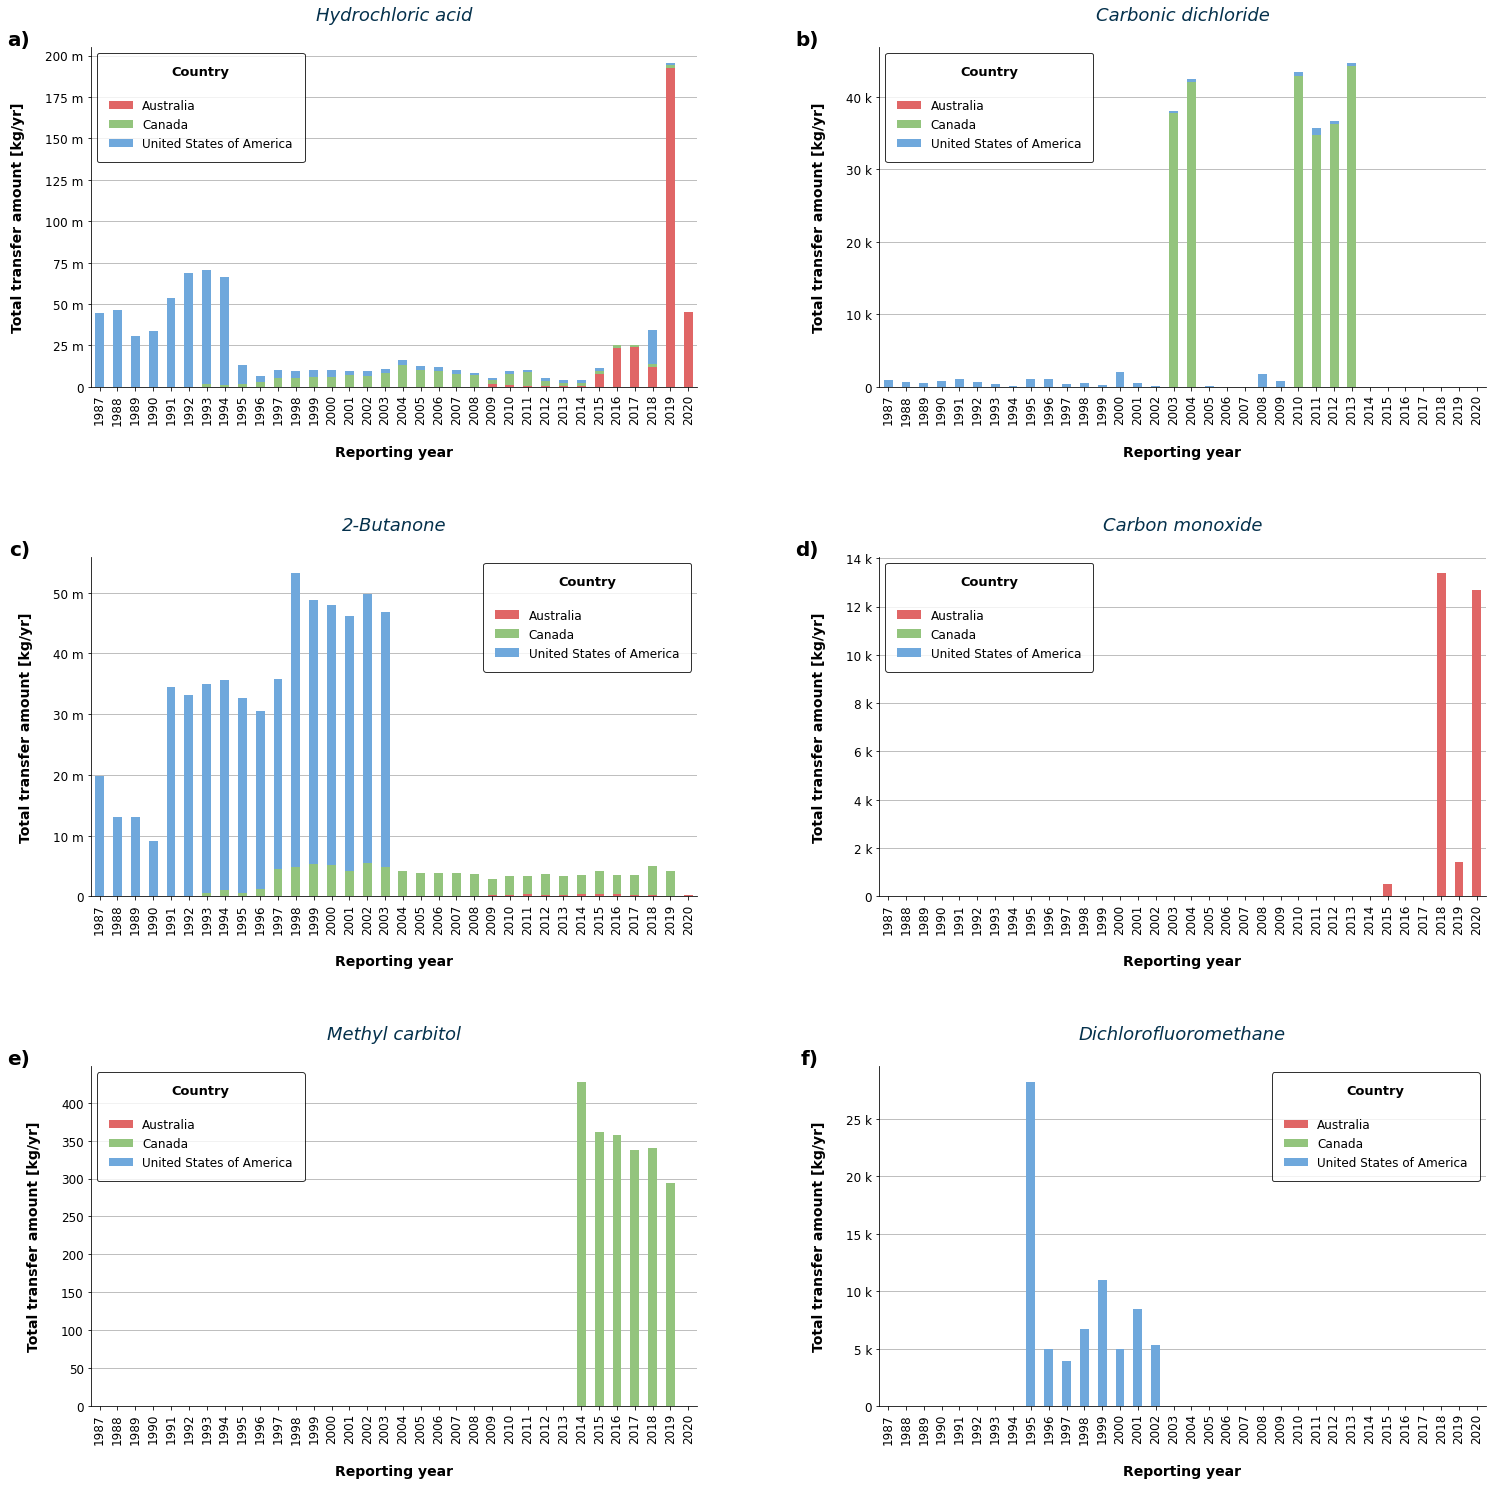

In [ ]:
fig6, ax6 = plt.subplots(3, 2, figsize=(25,25))

name_to_plot = {'Hydrochloric acid': 'Hydrochloric acid',
                'Carbonic dichloride': 'Carbonic dichloride',
                '2-Butanone': '2-Butanone',
                'Carbon monoxide': 'Carbon monoxide',
                'Ethanol, 2-(2-methoxyethoxy)-': 'Methyl carbitol',
                'Methane, dichlorofluoro-': 'Dichlorofluoromethane'}

color_to_country = {
    'Australia': '#e06666',
    'Canada': '#93c47d',
    'United States of America': '#6fa8dc'
}

chemicals = [['Hydrochloric acid', 'Carbonic dichloride'],
             ['2-Butanone', 'Carbon monoxide'],
             ['Ethanol, 2-(2-methoxyethoxy)-', 'Methane, dichlorofluoro-']]

letter_names = [['a)', 'b)'], ['c)', 'd)'], ['e)', 'f)']]


for row in range(3):
  for col in range(2):
    years = df.reporting_year.unique().tolist()
    years.sort()
    df_to_plot_7 = df.loc[df.generic_substance_name == chemicals[row][col],
                          ['reporting_year', 'transfer_amount_kg', 'country']]
    df_to_plot_7['country'] = df_to_plot_7.country.map({'AUS': 'Australia',
                                                    'CAN': 'Canada',
                                                    'USA': 'United States of America'})
    for year in years:
      df_year = df_to_plot_7[df_to_plot_7.reporting_year == year]
      if df_year.empty:
        df_to_plot_7 = pd.concat([df_to_plot_7,
                                  pd.DataFrame({'reporting_year': [year]*3,
                                                'transfer_amount_kg': [0]*3,
                                                'country': ['Australia', 'Canada', 'United States of America']})],
                                 axis=0, ignore_index=True)
      else:
        for country in ['Australia', 'Canada', 'United States of America']:
          if df_year[df_year.country == country].empty:
            df_to_plot_7 = pd.concat([df_to_plot_7,
                                    pd.DataFrame({'reporting_year': [year],
                                                  'transfer_amount_kg': [0],
                                                  'country': [country]})],
                                  axis=0, ignore_index=True)

    df_to_plot_7 = df_to_plot_7.pivot_table(index=['reporting_year'],
                         columns=['country'],
                         aggfunc='sum')
    df_to_plot_7.sort_index(ascending=True, inplace=True)
    color = [color_to_country[item[1]] for item in df_to_plot_7.columns.tolist()]
    
    df_to_plot_7.plot(kind='bar',
                  alpha=1,
                  ax=ax6[row][col],
                  stacked=True,
                  color=color)
    
    # Title
    ax6[row][col].set_title(f'{name_to_plot[chemicals[row][col]]}\n',
                            fontsize=18, style='italic', color='#05314c')

    # Organize vertical grid
    ax6[row][col].grid(axis='y') 
    ax6[row][col].set_axisbelow(True)

    # Axis names
    ax6[row][col].set_ylabel('Total transfer amount [kg/yr]', fontsize=14, fontweight='bold', labelpad=20)
    ax6[row][col].set_xlabel('Reporting year', fontsize=14, fontweight='bold', labelpad=20)

    # Remove top and right boders
    ax6[row][col].spines['right'].set_visible(False)
    ax6[row][col].spines['top'].set_visible(False)

    # X ticks fontsize
    for tick in ax6[row][col].xaxis.get_major_ticks():
      tick.label.set_fontsize(12)

    # Y ticks fontsize and format
    for tick in ax6[row][col].yaxis.get_major_ticks():
      tick.label.set_fontsize(12)
    ax6[row][col].get_yaxis().set_major_formatter(FuncFormatter(lambda x, pos:
                                                                  f'{int(x)}' if (x < 1e3)
                                                                  else (f'{int(x/1e3)} k' if (x < 1e6)
                                                                        else f'{format(int(x/1e6), ",")} m')
                                                                )
                                                  )

    # Legend
    leg6 = ax6[row][col].legend(frameon=True, fontsize=12,
          title='Country\n',
          title_fontsize=13,
          borderpad=1,
          labels=['Australia', 'Canada', 'United States of America'])
    leg6.get_frame().set_edgecolor('black')
    leg6.get_title().set_fontweight('bold')


    # Name for subplot
    ax6[row][col].text(-0.1, 1.05, letter_names[row][col], transform=ax6[row][col].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')    

# Space between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.savefig('./totalflowforchemicals.pdf', dpi=fig6.dpi, bbox_inches='tight')

plt.show()

## **8. Top 10 of industry sectors**

In [ ]:
top_10 = df[['generic_sector_name', 'transfer_amount_kg']].groupby(['generic_sector_name']).sum().sort_values(by='transfer_amount_kg', ascending=False).head(10).index.tolist()

In [ ]:
df_top_10 = df.loc[df.generic_sector_name.isin(top_10),
                   ['generic_sector_name', 'transfer_amount_kg',
                    'reporting_year', 'generic_transfer_class_name']]

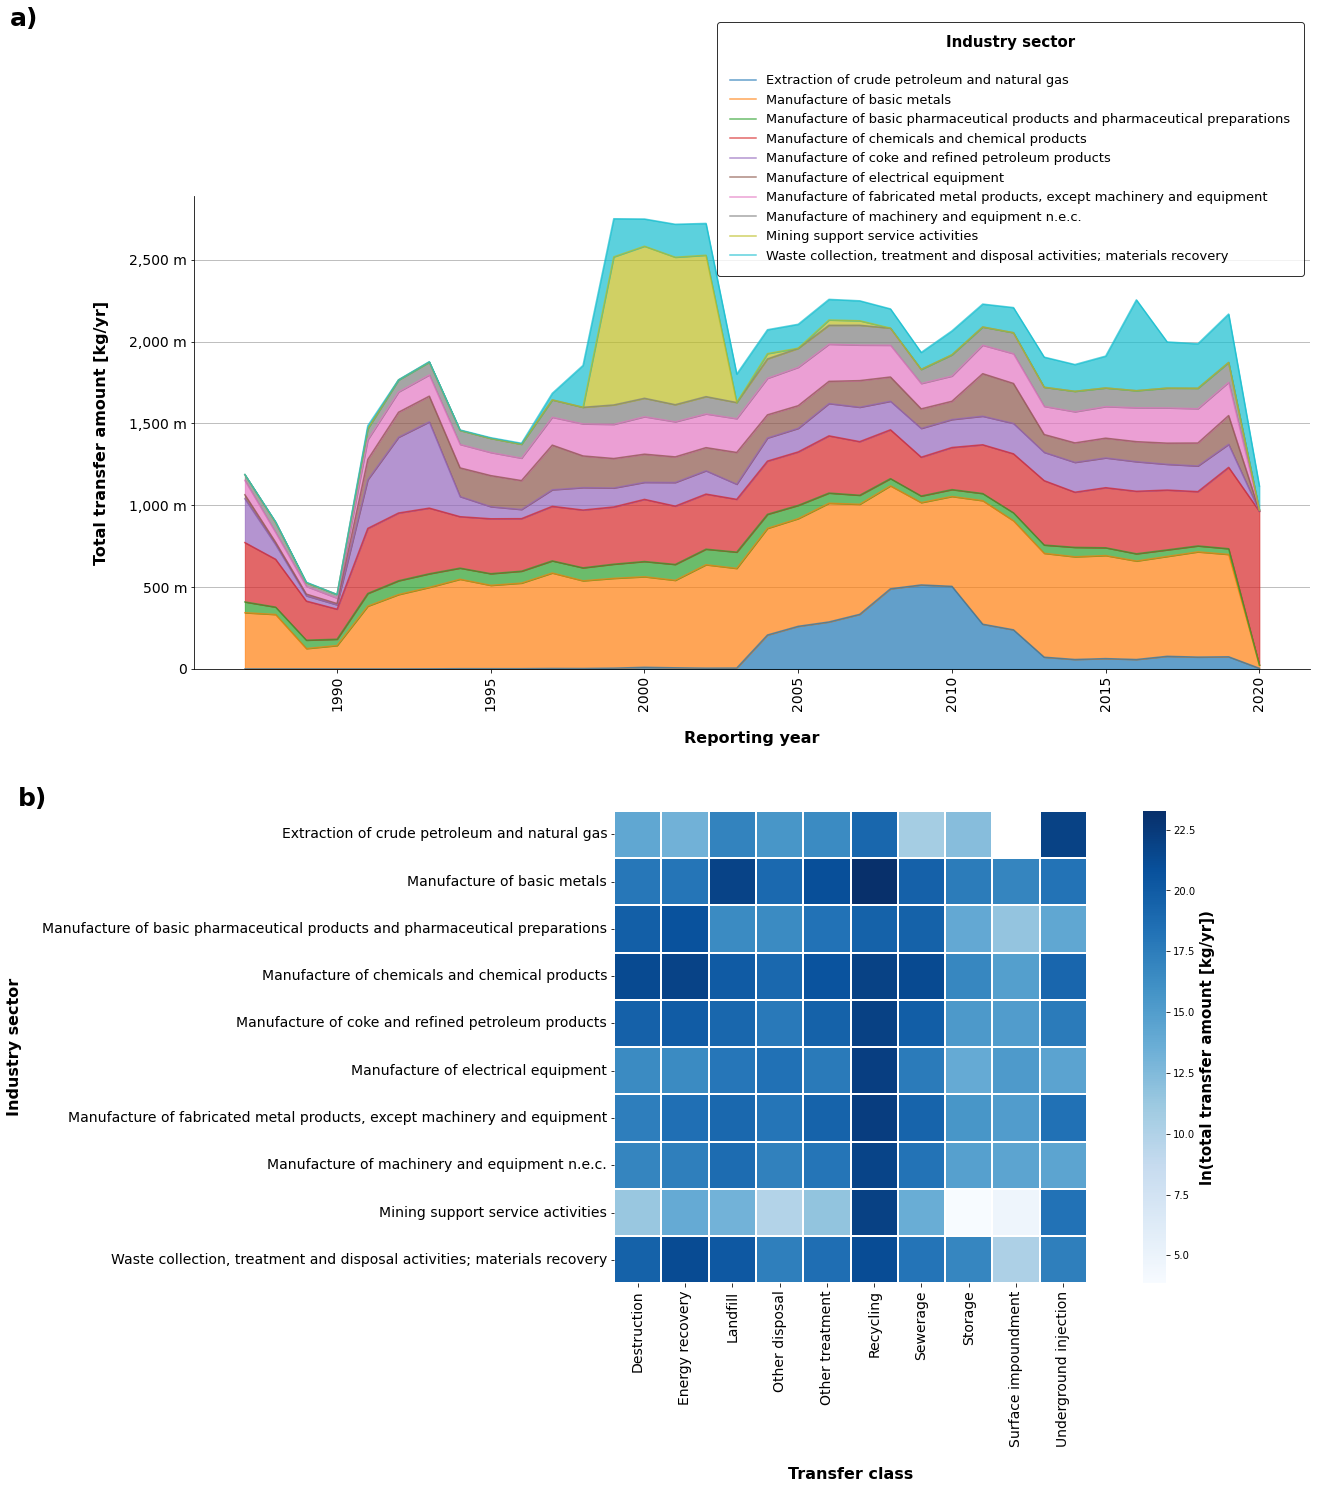

In [ ]:
fig7, ax7 = plt.subplots(2, 1, figsize=(20,20))

# Subplot 1
df_top_10_1 = df_top_10[['reporting_year', 'generic_sector_name', 'transfer_amount_kg']]
df_top_10_1 = df_top_10_1.pivot_table(columns=['generic_sector_name'],
                                      index=['reporting_year'],
                                      aggfunc='sum')

df_top_10_1.plot(kind='area',
                 stacked=True,
                 ax=ax7[0],
                 alpha=0.7,
                 rot=90)

# Organize vertical grid
ax7[0].grid(axis='y') 
ax7[0].set_axisbelow(True)

# Axis names
ax7[0].set_ylabel('Total transfer amount [kg/yr]', fontsize=16, fontweight='bold', labelpad=20)
ax7[0].set_xlabel('Reporting year', fontsize=16, fontweight='bold', labelpad=20)

# Remove top and right boders
ax7[0].spines['right'].set_visible(False)
ax7[0].spines['top'].set_visible(False)

# X ticks fontsize
for tick in ax7[0].xaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Y ticks fontsize
for tick in ax7[0].yaxis.get_major_ticks():
  tick.label.set_fontsize(14)
ax7[0].get_yaxis().set_major_formatter(FuncFormatter(lambda x, pos:
                                                                  f'{int(x)}' if (x < 1e3)
                                                                  else (f'{int(x/1e3)} k' if (x < 1e6)
                                                                        else f'{format(int(x/1e6), ",")} m')
                                                                )
                                                  )

# Legend
leg7 = ax7[0].legend(frameon=True, fontsize=13,
           title='Industry sector\n',
           title_fontsize=15,
           borderpad=1,
           labels=[col[1] for col in df_top_10_1.columns],
           loc='center right',
           bbox_to_anchor=(1, 1.1))
leg7.get_frame().set_edgecolor('black')
leg7.get_title().set_fontweight('bold')

# Name for subplot 1
ax7[0].text(-0.14, 1.4, 'a)', transform=ax7[0].transAxes,
  fontsize=25, fontweight='bold', va='top', ha='right')

# Subplot 2
df_top_10_2 = df_top_10[['generic_transfer_class_name', 'generic_sector_name', 'transfer_amount_kg']]
df_top_10_2 = df_top_10_2.pivot_table(columns=['generic_transfer_class_name'],
                                      index=['generic_sector_name'],
                                      aggfunc='sum')
df_top_10_2 = np.log(df_top_10_2)
df_top_10_2.columns = [col[1] for col in df_top_10_2.columns]
sns.heatmap(df_top_10_2, ax=ax7[1],
            cbar_kws={'label': 'ln(total transfer amount [kg/yr])'},
            linewidth=1, linecolor='w', square=True,
            cmap='Blues')

# Color bar
ax7[1].figure.axes[-1].yaxis.label.set_size(15)
ax7[1].figure.axes[-1].yaxis.label.set_fontweight('bold')
for tick in ax7[1].figure.axes[-1].yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Axis names
ax7[1].set_ylabel('Industry sector', fontsize=16, fontweight='bold', labelpad=20)
ax7[1].set_xlabel('Transfer class', fontsize=16, fontweight='bold', labelpad=20)

# X ticks fontsize
for tick in ax7[1].xaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Y ticks fontsize
for tick in ax7[1].yaxis.get_major_ticks():
  tick.label.set_fontsize(14)

# Name for subplot 2
ax7[1].text(-1.2, 1.05, 'b)', transform=ax7[1].transAxes,
  fontsize=25, fontweight='bold', va='top', ha='right')

plt.subplots_adjust(hspace=0.3)

plt.savefig('./top10industries.pdf', dpi=fig7.dpi, bbox_inches='tight')

plt.show()

In [10]:
df_to_plot_6 = df[['country', 'generic_transfer_class_name']]
df_to_plot_6['times'] = 1
df_to_plot_6 = df_to_plot_6.groupby(['country', 'generic_transfer_class_name'], as_index=False).sum()
df_to_plot_6['country'] = df_to_plot_6.country.map({'AUS': 'Australia',
                                                    'CAN': 'Canada',
                                                    'USA': 'United States of America'})
df_to_plot_6 = df_to_plot_6.pivot_table(columns=['generic_transfer_class_name'],
                         index=['country'],
                          aggfunc='sum')
df_to_plot_6 = (df_to_plot_6.T * 100/ df_to_plot_6.T.sum(axis=0)).T
df_to_plot_6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


times  ...                      
generic_transfer_class_name Destruction  ... Underground injection
country                                  ...                      
Australia                      4.579986  ...              0.767869
Canada                        12.527360  ...              3.311632
United States of America       9.869846  ...              0.835959

[3 rows x 10 columns]

In [9]:
df_to_plot_6

times  ...                      
generic_transfer_class_name Destruction  ... Underground injection
country                                  ...                      
Australia                        1682.0  ...                 282.0
Canada                          26843.0  ...                7096.0
United States of America       282792.0  ...               23952.0

[3 rows x 10 columns]